# PCA and k-means on wave spikes

In [1]:
%matplotlib inline
import numpy as np
import scipy.io as spio
import scipy.io
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#Load data
presorted = {k:v for k, v in scipy.io.loadmat('spike_waveforms').items()\
            if k in ('sig118a_wf', 'sig118b_wf', 'sig118c_wf')}
presorted=[presorted['sig118a_wf'], presorted['sig118b_wf'], presorted['sig118c_wf']]

In [2]:
def _make_training_set(data):
    """Separate data set into 2 sets.
    1/6 of the dataset is training set and the rest is test set
    Parameter:
    data: waveform data (width= number of samples per spike)
    """
    n=data.shape[0]
    idx_training=np.random.choice(n,n//6, replace=False)
    training_set=data[idx_training]
    test_set=[data[i] for i in range(n) if n not in idx_training]
    return training_set, test_set

#Create training and testing dataset
two_neurons_training, two_neurons_test=_make_training_set(np.concatenate(presorted[1:]))
three_neurons_training, three_neurons_test=_make_training_set(np.concatenate(presorted))

Text(0.5,1,'100 random spikes')

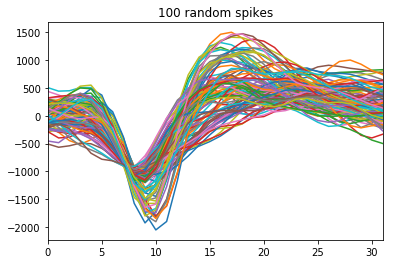

In [3]:
#Plot 100 random spikes
for waveforms in three_neurons_training[:100]:
    plt.plot(waveforms)
plt.xlim((0,31))
plt.title('100 random spikes')

Text(0.5,1,'Averaged presorted 3 neuron spikes')

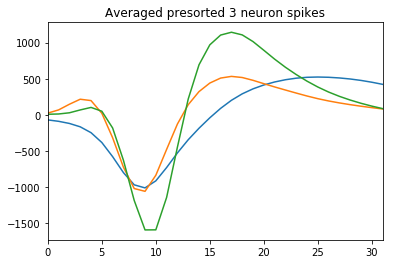

In [5]:
# Plot the 3 spike shapes based on the presorted data
plt.figure()
for waveforms in presorted:
    plt.plot(np.mean(waveforms, axis=0))
plt.xlim((0,31))
plt.title('Averaged presorted 3 neuron spikes')

In [6]:
def PCA_train(training_set, n_components):
    mean=np.mean(training_set, axis=0)
    data=training_set-mean
    U,S,VT=np.linalg.svd(data)
    basis_components=VT[:n_components,:]
    return basis_components, mean

def PCA_classify(data, new_basis, mean):
    return (np.array(data)-mean)@new_basis.T

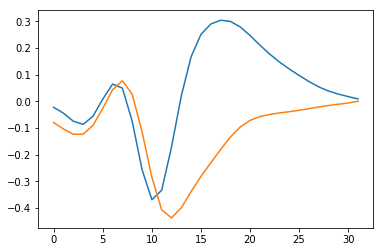

In [7]:
#Perform PCA and plot the first 2 principal components
two_new_basis, two_mean=PCA_train(two_neurons_training,2)

#Plot the basis components
for comp in two_new_basis:
    plt.plot(comp)

Text(0.5,1,'Presorted data')

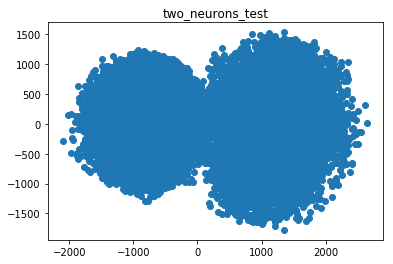

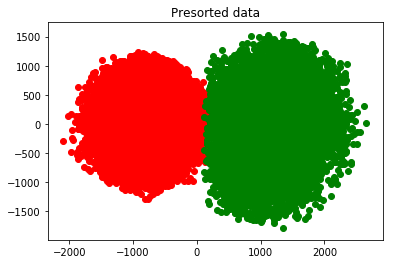

In [8]:
#Project the test data two_neurons_test to the basis you found earlier
two_classified=PCA_classify(two_neurons_test, two_new_basis, two_mean)

#Plot the classified neurons
plt.figure()
plt.scatter(*two_classified.T)
plt.title('two_neurons_test')

#Project the presorted data and plot it
plt.figure()
presorted_two_classified=[PCA_classify(spikes, two_new_basis, two_mean) for spikes in presorted[1:]]
colors=['red','green']
for dat, color in zip(presorted_two_classified, colors):
    plt.scatter(*dat.T, c=color)
plt.title('Presorted data')

In [39]:
# Count number of observations in each cluster
print(len(presorted_two_classified[1]))
print(len(presorted_two_classified[0]))

7799
11558


# Part a)

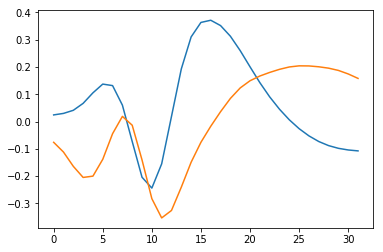

In [9]:
# Perform PCA on three_neurons and plot the first 2 principal components.
three_new_basis2, three_mean2 = PCA_train(three_neurons_training, 2)

# Plot the basis components
for comp in three_new_basis2:
    plt.plot(comp)

Text(0.5,1,'Presorted data')

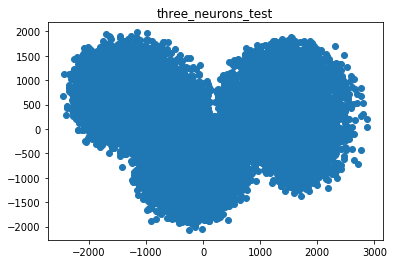

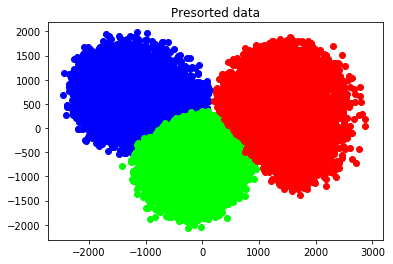

In [10]:
#Project the test data two_neurons_test to the basis you found earlier
three_classified2=PCA_classify(three_neurons_test, three_new_basis2, three_mean2)

#Plot the classified neurons
plt.figure()
plt.scatter(*three_classified2.T)
plt.title('three_neurons_test')

#Project the presorted data and plot it
plt.figure()
presorted_three_classified2=[PCA_classify(spikes, three_new_basis2, three_mean2) for spikes in presorted]
colors=['#0000ff','#00ff00','red']
for dat, color in zip(presorted_three_classified2, colors):
    plt.scatter(*dat.T, c=color)
plt.title('Presorted data')

In [12]:
# Count number of observations in each cluster
print(len(presorted_three_classified2[0]))
print(len(presorted_three_classified2[1]))
print(len(presorted_three_classified2[2]))

7031
11558
7799


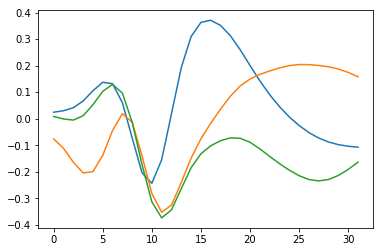

In [13]:
# Perform PCA on three_neurons and plot the first 3 principal components.
three_new_basis3, three_mean3 = PCA_train(three_neurons_training, 3)

# Plot the basis components
for comp in three_new_basis3:
    plt.plot(comp)

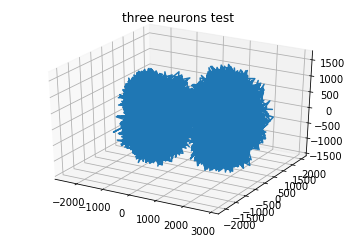

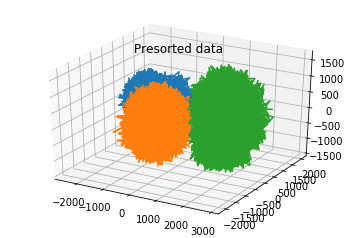

In [14]:
# Project the test data three_neurons_test to the basis you found earlier
three_classified3 = PCA_classify(three_neurons_test, three_new_basis3, three_mean3)

# Plot the classified neurons
plt.rcParams['legend.fontsize'] = 8

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(*three_classified3.T )
plt.title('three neurons test')
ax.legend()

plt.show()

# Project the presorted data and plot it
fig = plt.figure()
plt.rcParams['legend.fontsize'] = 8
presorted_three_classified3 = [PCA_classify(spikes, three_new_basis3, three_mean3) for spikes in presorted]
colors = ['red', 'green','blue']
for dat, color in zip(presorted_three_classified3, colors):
    ax = fig.gca(projection='3d')
    ax.plot(*dat.T)
    plt.title('Presorted data')
    ax.legend()
plt.show()

In [15]:
# Count number of observations in each cluster
print(len(presorted_three_classified3[0]))
print(len(presorted_three_classified3[1]))
print(len(presorted_three_classified3[2]))

7031
11558
7799


# Summary:
Two principle components are enough to classify this dataset. The result are the same for 2 or 3 principle components.

# Part b)

In [35]:
# K means for two-neurons
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.concatenate(presorted[1:]))

In [36]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 7748, 1: 11609}

In [37]:
# K means for three-neurons
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(np.concatenate(presorted))

In [38]:
unique, counts = np.unique(kmeans2.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 6680, 1: 11963, 2: 7745}

# Part c)

PCA results are for two neurons: 7799 and 11558.  
K means results for two neurons: 7748 and 11609.  

PCA results are for three neurons: 7031, 11558, 7799.  
K means results for three neurons: 6680, 11963, 7745.  

The results for both methods differ but not by much. For the PCA method all 'new' observations are assigned to the 'new' neuron whereas K means assigns observations to the 'old' neurons.